In [1]:
###
#Goal: See how varying SRM HR curvature will affect the sensitivity to the interferometer.
#First we use all of the aLIGO cavities to derive the ideal mode-matching parameters
#then we extract the beam q from the PRC, ITMX, and ITMY
#then we inject the previously extracted beam parameters with the "gauss" Command and slowly vary the SRM curvature
#to achieve an "almost" perfect mode-matching setup.
#we leave OMC untouched so that it will just have the SRC mismodematch propogated downstream.
###

In [1]:
%matplotlib inline
import pykat
import pylab as pl
import pandas
import matplotlib.pyplot as plt
import matplotlib
import csv
import math
import numpy as np
from pykat.parallel import parakat
from PropBeam import *

pandas.set_eng_float_format(accuracy=3, use_eng_prefix=True)

                                              ..-
    PyKat 1.0.8           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
####Perfect Mode-Matching Version:
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem2.kat"
#katfile = "aligo_IFO_maxtem2.kat"

basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)

# Add cavity parameter detectors
basekat.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor


# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1


bp OFI_outqx x q nOBAout
bp OFI_outqy y q nOBAout

cp cavOMC x q

cp cavOMC x z

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans

xaxis darm f log 5 5k 50

yaxis lin re:im
""")

basekat.undumpNodes() #undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code
kat.verbose = False
out = kat.run()

OFI_outqx = out["OFI_outqx"]
OFI_outqy = out["OFI_outqy"]

OMC_Waist_Location = out["cavOMC_x_z"][0].real #distance from first optic in cavity(OMC_HR surface) to the waist

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.


In [6]:
kat.ITMXTL.f.value

34500.0

In [21]:
kat1=basekat.deepcopy() #copy kat code
kat.verbose = False

ITMTL0 = kat1.ITMYTL.f.value
d_mismatch = []
OFI_outqx = []
OFI_outqy = []
darm = []

In [22]:
dp = 10 #Steps
diopters = 20e-6 #Estimated Avg fluctuations in TCS

for i in range(dp+1):
    mm = diopters*(float(i)/dp)
    print(float(i)/dp)
    f_new = (1/ITMTL0 + mm)**(-1)
    kat1.ITMYTL.f = f_new
    kat1.ITMXTL.f = -f_new
    print(kat1.ITMYTL.f)
    outs = kat1.run()
    d_mismatch.append(  mm )
    OFI_outqx.append(outs["OFI_outqx"])
    OFI_outqy.append(outs["OFI_outqy"])
    darm.append(outs["NSR_with_RP"])
    
for i in range(dp+1):
    mm = diopters*(float(i)/dp)
    print(float(i)/dp)
    f_new = (1/ITMTL0 - mm)**(-1)
    kat1.ITMXTL.f = f_new
    kat1.ITMYTL.f = -f_new
    print(f_new)
    outs = kat1.run()
    d_mismatch.append(  -mm )
    OFI_outqx.append(outs["OFI_outqx"])
    OFI_outqy.append(outs["OFI_outqy"])
    darm.append(outs["NSR_with_RP"])

0.0
34500.0
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:12.263327


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.30048 seconds
0.1
32273.152478952295
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:14.564292


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.7432 seconds
0.2
30316.344463971884
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:17.308064


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.40169 seconds
0.3
28583.264291632146
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:19.710191


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.38097 seconds
0.4
27037.617554858934
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:22.091601


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.49869 seconds
0.5
25650.557620817843
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:24.590669


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.24715 seconds
0.6
24398.868458274403
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:26.838238


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.41882 seconds
0.7
23263.65475387728
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:29.257776


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.69166 seconds
0.8
22229.38144329897
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:31.949837


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.47252 seconds
0.9
21283.158544108577
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:34.422757


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.75892 seconds
1.0
20414.201183431953
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:37.182118


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.54292 seconds
0.0
34500.0
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:39.726100


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.94734 seconds
0.1
37056.928034371645
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:42.673832


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.83042 seconds
0.2
40023.201856148495
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:45.504808


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 3.18931 seconds
0.3
43505.67465321564
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:48.694527


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.82855 seconds
0.4
47651.933701657465
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:51.523511


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.26804 seconds
0.5
52671.75572519085
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:53.791955


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.2489 seconds
0.6
58873.72013651878
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:56.041251


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.94542 seconds
0.7
66731.14119922632
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:27:58.987096


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.61542 seconds
0.8
77008.9285714286
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:28:01.602965


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.56023 seconds
0.9
91029.02374670186
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:28:04.163580


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.30804 seconds
1.0
111290.3225806452
--------------------------------------------------------------
Running kat - Started at 2016-08-16 09:28:06.471985

Finished in 2.36678 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [35]:
lam = 1064e-9
pi = 3.1415926

w = []
for i in range(0,len(OFI_outqx),1):
    psi = 1/OFI_outqx[i][0]
    w_i = (-lam/(pi*psi.imag))**(.5)
    w.append(w_i)

micro_d  =[]
mm_waist =[]
for i in range(0,len(OFI_outqx),1):
    micro_d.append(d_mismatch[i]*1e6)
    mm_waist.append(w[i]*1000)

/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


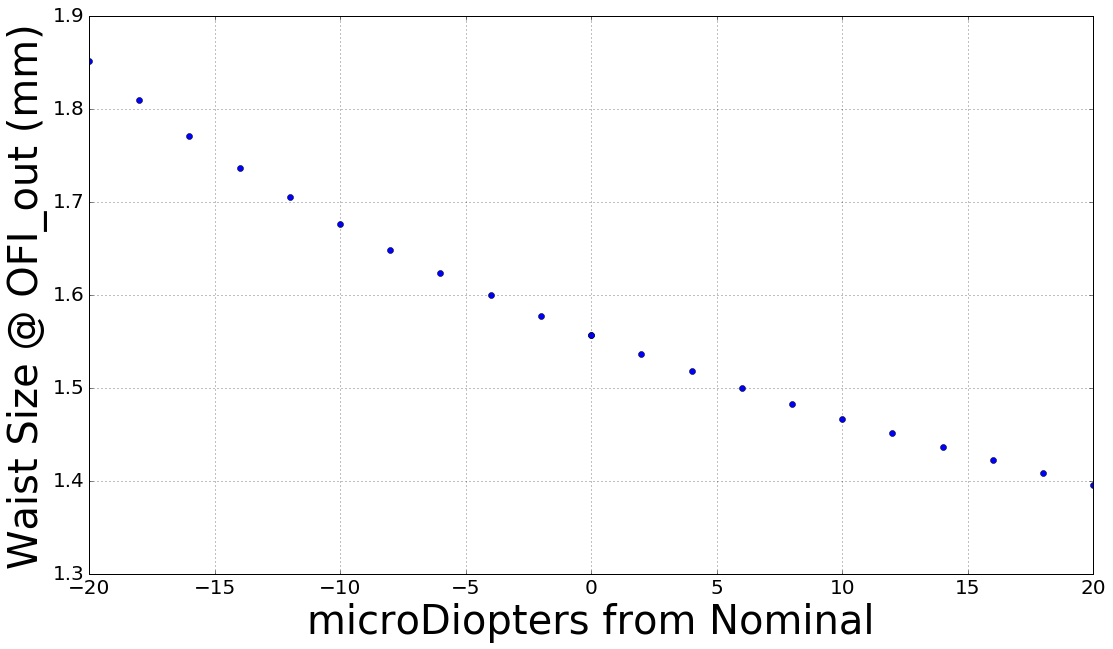

In [36]:
pl.figure(figsize=(18, 10), dpi=80)
pl.subplot(111)
pl.plot(micro_d, mm_waist, 'o')

pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("microDiopters from Nominal",  fontsize=40)
pl.ylabel("Waist Size @ OFI_out (mm)", fontsize=40)
pl.tick_params(labelsize=20)

#pl.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#pl.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


pl.show()

/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


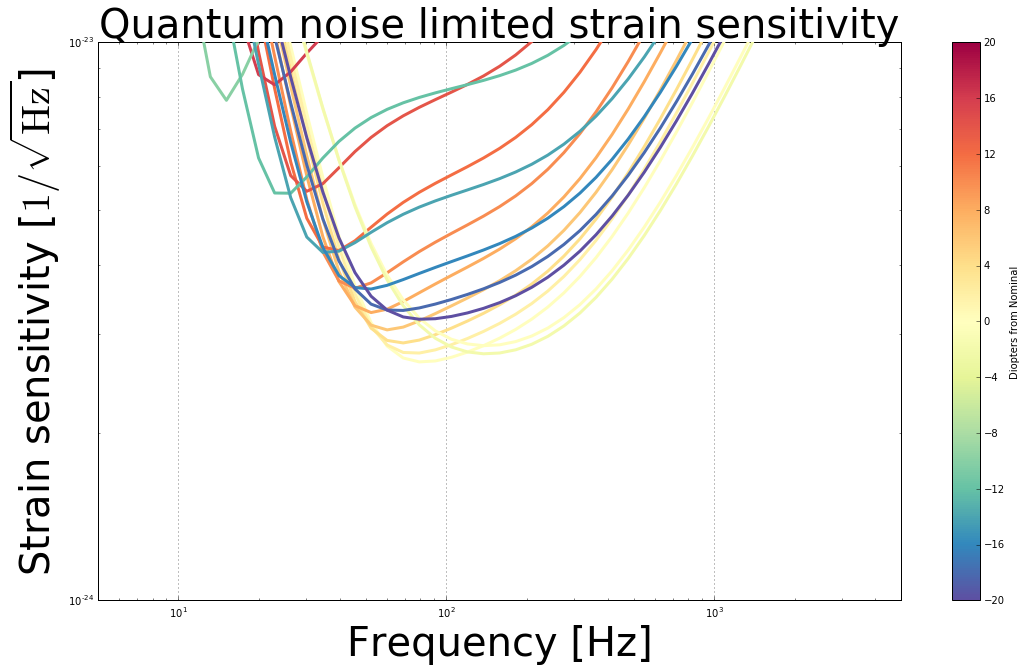

In [25]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(darm)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.loglog(outs.x, np.real(darm[i]),linewidth=3,zorder=1000, color = c,)
    
pl.subplot(111)



pl.title("Quantum noise limited strain sensitivity",fontsize=40)
pl.xlim(outs.x.min(),outs.x.max())
pl.ylim(1e-24,1e-23)

pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("Frequency [Hz]",fontsize=40)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=40)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")
#pylab.savefig("fc_mismatch_to_sqz_ifo_maxtem_%i_sqzing_%g.pdf" % (maxtem, kat.sqz.db))


pl.show()

In [26]:
f = open('q_OFI_out.txt', 'w')
wr = csv.writer(f)
for i in range(0,len(micro_d),1):
        wr.writerow( [ micro_d[i], OFI_outqx[i][0] ])
f.close()

In [27]:
d1 = 2.724 # distance from OFI output to OM1
d2 = 1.395 # distance from OM1 to OM2
d3 = 0.631 # distance from OM2 to OM3
d4 = 0.196 # distance from OM3 to Input Coupler
d5 = 0.565   # distance from IC to end of OMC cavity. OMC round trip is 1.13


f1 = -4.6/2
f2 = 1.7058/2
f3 = math.inf
f4 = math.inf


w_full = []
d_full = []

for i in range(0,len(micro_d),1):
    q_in = OFI_outqx[i][0]
    tele = PropBeam(q_in,d1,d2,d3,d4,d5,f1,f2,f3,f4)
    out_modal = tele.FullModal()
    w_full.append( out_modal['w_modal'] )
    d_full.append( out_modal['d_modal'] )



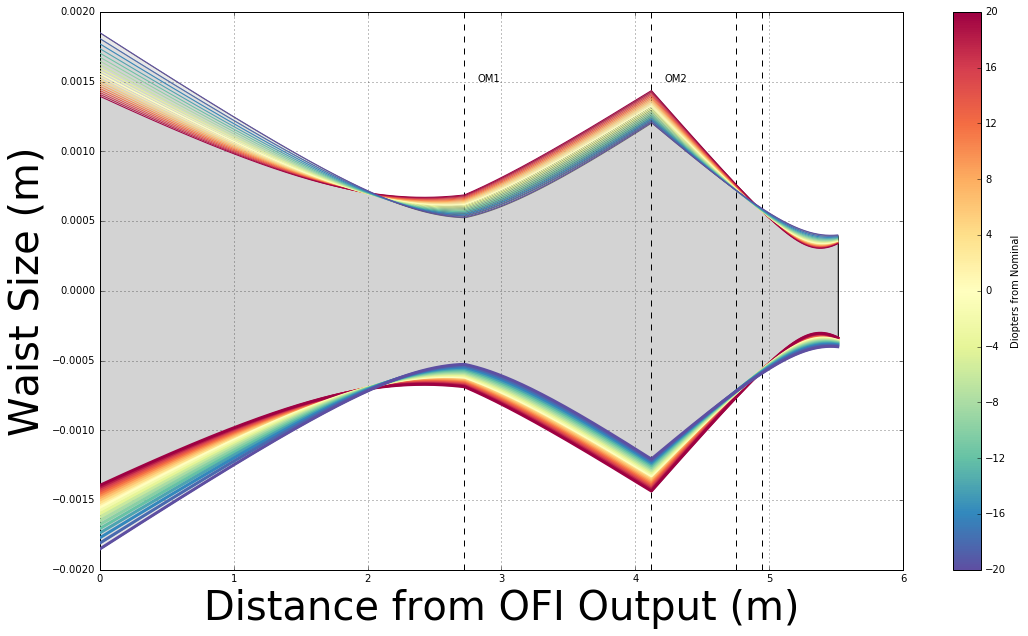

In [28]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(micro_d)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.plot(d_full[0], w_full[i],linewidth=1,zorder=1000, color = c)
    neg = [ -x for x in w_full[i]]
    pl.plot(d_full[0], neg,linewidth=3,zorder=1000, color = c)
    pl.fill_between(d_full[0], w_full[i], neg, facecolor='lightgrey', alpha=0.5)
pl.subplot(111)


pl.axvline(x=d1,color='k',ls='dashed')
pl.axvline(x=d1+d2,color='k',ls='dashed')
pl.axvline(x=d1+d2+d3,color='k',ls='dashed')
pl.axvline(x=d1+d2+d3+d4,color='k',ls='dashed')

pl.annotate('OM1' ,xy=(d1+.1, .0015))
pl.annotate('OM2' ,xy=(d1+d2+.1, .0015))

#pl.title("Quantum noise limited strain sensitivity")
#pl.xlim(0,9)
#pl.ylim(-1,1)

pl.grid(True, zorder=-1)
#pl.legend()

pl.xlabel("Distance from OFI Output (m)",fontsize=40)
pl.ylabel("Waist Size (m)",fontsize=40)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")



In [29]:
#Extract the waist size and location
omc_waist_location = []
omc_waist_size = []

for i in range(0, len(micro_d),1):
    omc_waist_size.append(min(w_full[i]))
    index = w_full[i].index(min(w_full[i]))
    omc_waist_location.append(d_full[0][index])
    

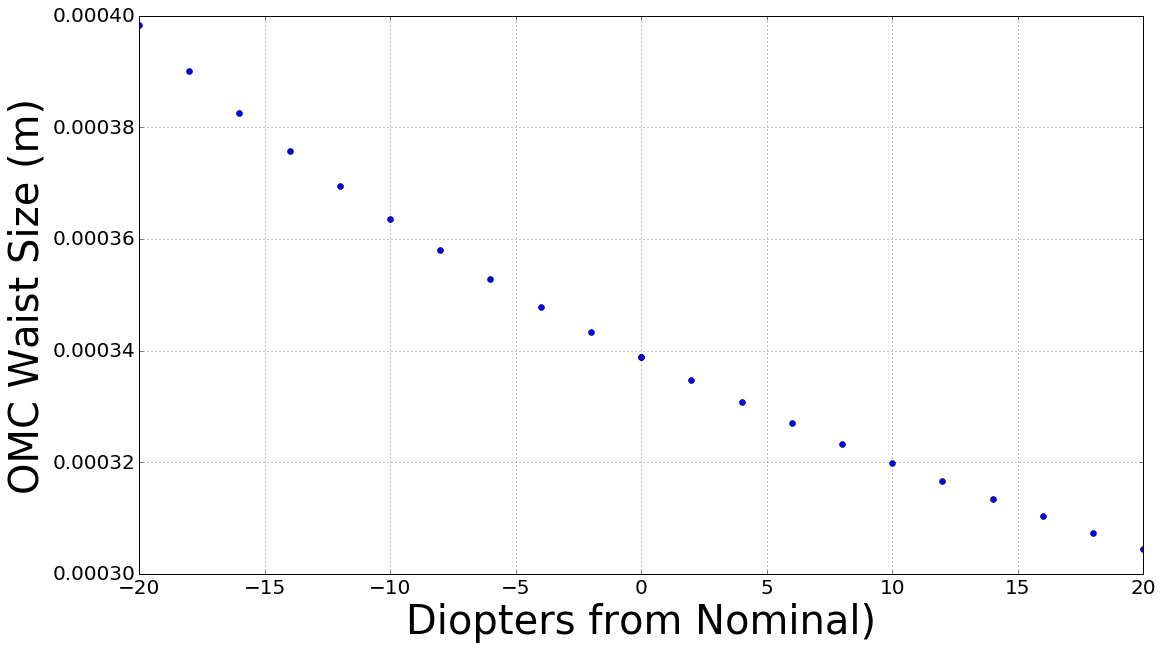

In [30]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)
pl.plot(micro_d, omc_waist_size, 'o')

pl.grid(True, zorder=-1)
pl.tick_params(labelsize=20)
pl.xlabel("Diopters from Nominal)",fontsize=40)
pl.ylabel("OMC Waist Size (m)",fontsize=40)

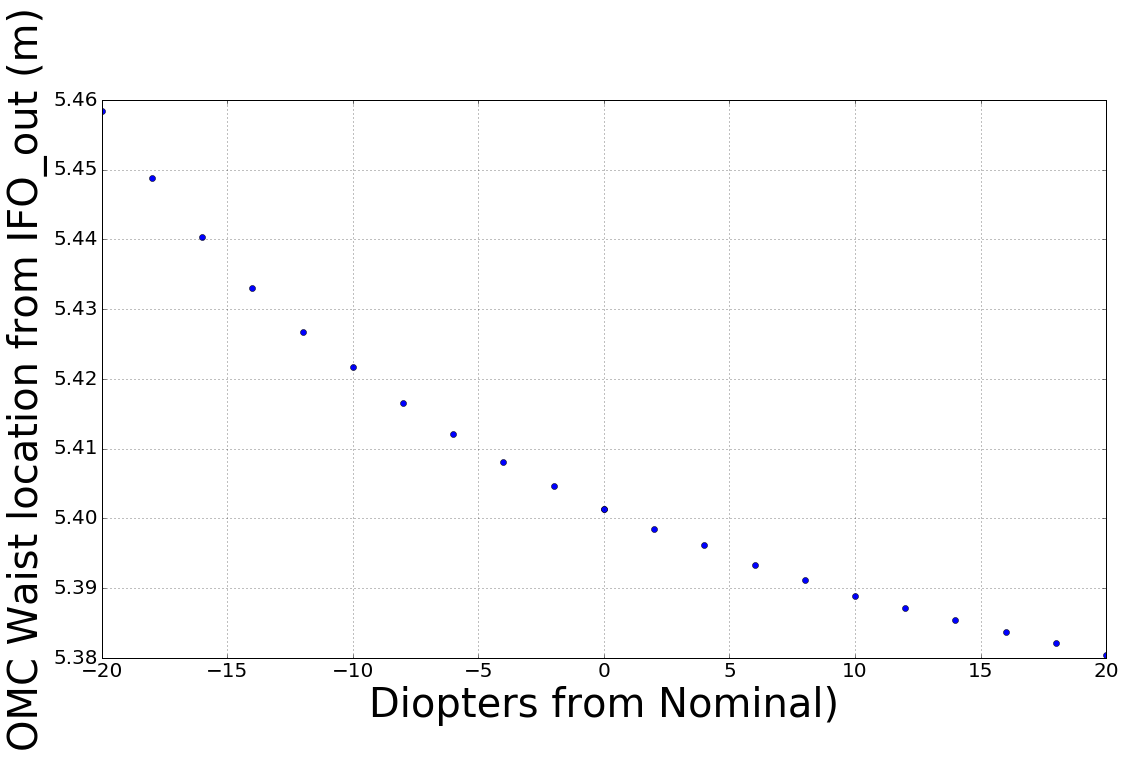

In [31]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)
pl.plot(micro_d, omc_waist_location, 'o')

pl.grid(True, zorder=-1)
pl.tick_params(labelsize=20)
pl.xlabel("Diopters from Nominal)",fontsize=40)
pl.ylabel("OMC Waist location from IFO_out (m)",fontsize=40)

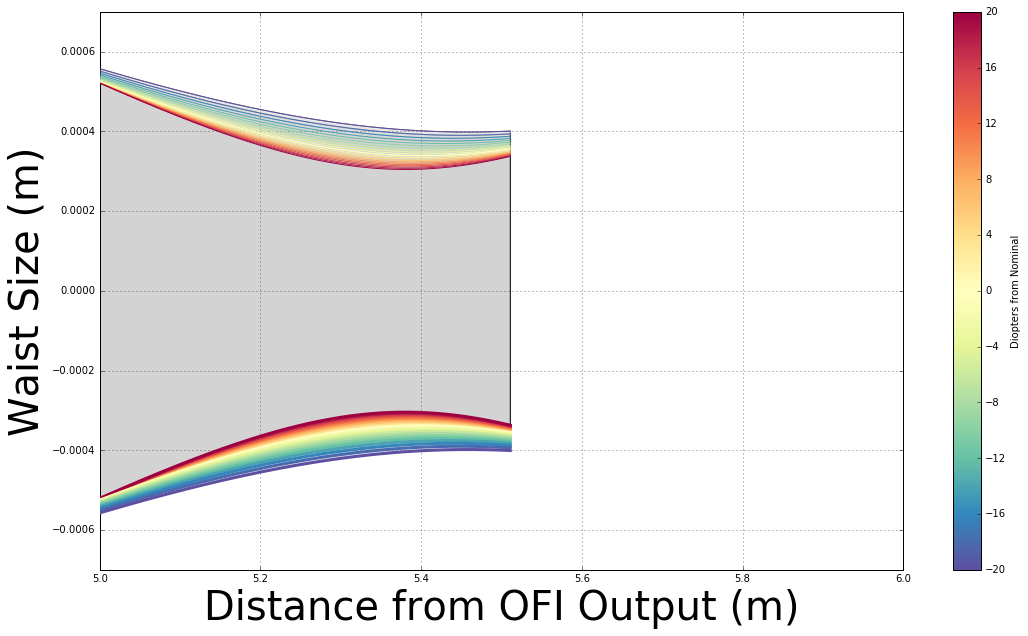

In [32]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(micro_d)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.plot(d_full[0], w_full[i],linewidth=1,zorder=1000, color = c)
    neg = [ -x for x in w_full[i]]
    pl.plot(d_full[0], neg,linewidth=3,zorder=1000, color = c)
    pl.fill_between(d_full[0], w_full[i], neg, facecolor='lightgrey', alpha=0.5)
pl.subplot(111)

#pl.title("Quantum noise limited strain sensitivity")
pl.xlim(5.0,6.0)
pl.ylim(-.0007,.0007)

pl.grid(True, zorder=-1)
#pl.legend()

pl.xlabel("Distance from OFI Output (m)",fontsize=40)
pl.ylabel("Waist Size (m)",fontsize=40)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")


In [33]:
f = open('waist_location.txt', 'w')
wr = csv.writer(f)
for i in range(0,len(micro_d),1):
        wr.writerow([micro_d[i],omc_waist_location[i]])
f.close()


In [34]:
l = open('waist_size.txt', 'w')
wr = csv.writer(l)
for i in range(0,len(micro_d),1):
        wr.writerow([micro_d[i],omc_waist_size[i]])
l.close()
